Sources:
https://github.com/Open-Power-System-Data/time_series/blob/2019-05-15/main.ipynb

https://open-power-system-data.org/

Time series description:
https://data.open-power-system-data.org/time_series/

In [1]:
# check for more data:
# https://toolbox.google.com/datasetsearch





In [2]:
import pandas as pd
import numpy as np

# Main data (Price, onshore, load)

In [3]:
data=pd.read_csv("./time_series_30min_singleindex.csv")

In [4]:
data.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'CY_load_actual_entsoe_transparency',
       'CY_load_forecast_entsoe_transparency',
       'CY_wind_onshore_generation_actual', 'FR_load_actual_tso',
       'FR_load_forecast_tso', 'FR_solar_generation_actual',
       'FR_wind_onshore_generation_actual', 'GB_EAW_load_actual_tso',
       'GB_GBN_load_actual_entsoe_transparency',
       'GB_GBN_load_actual_gross_generation_tso', 'GB_GBN_load_actual_tso',
       'GB_GBN_load_forecast_entsoe_transparency', 'GB_GBN_solar_capacity',
       'GB_GBN_solar_generation_actual', 'GB_GBN_solar_generation_actual_dso',
       'GB_GBN_solar_generation_actual_tso', 'GB_GBN_solar_profile',
       'GB_GBN_wind_capacity', 'GB_GBN_wind_generation_actual',
       'GB_GBN_wind_generation_actual_dso',
       'GB_GBN_wind_generation_actual_tso', 'GB_GBN_wind_profile',
       'GB_GBN_wind_offshore_capacity',
       'GB_GBN_wind_offshore_generation_actual',
       'GB_GBN_wind_offshore_profile', 'GB_GBN_wind_

In [5]:
columns=data.columns[data.columns.str.contains('IE_')].to_list()

In [6]:
columns.append('utc_timestamp')

In [7]:
columns.append('GB_GBN_load_actual_tso')
columns.append('GB_GBN_solar_generation_actual')
columns.append('GB_GBN_wind_generation_actual')

In [8]:
columns

['IE_load_actual_entsoe_transparency',
 'IE_load_forecast_entsoe_transparency',
 'IE_wind_onshore_generation_actual',
 'IE_sem_load_actual_entsoe_transparency',
 'IE_sem_load_forecast_entsoe_transparency',
 'IE_sem_price_day_ahead',
 'IE_sem_wind_onshore_generation_actual',
 'utc_timestamp',
 'GB_GBN_load_actual_tso',
 'GB_GBN_solar_generation_actual',
 'GB_GBN_wind_generation_actual']

In [9]:
df_complete=data[columns]

In [10]:
df_complete=df_complete.set_index('utc_timestamp')

In [11]:
del df_complete.index.name

In [12]:
df_complete=df_complete.dropna()

In [13]:
df_complete.index=pd.to_datetime(df_complete.index)

In [14]:
df_complete.head()

,IE_load_actual_entsoe_transparency,IE_load_forecast_entsoe_transparency,IE_wind_onshore_generation_actual,IE_sem_load_actual_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead,IE_sem_wind_onshore_generation_actual,GB_GBN_load_actual_tso,GB_GBN_solar_generation_actual,GB_GBN_wind_generation_actual
2015-01-06 00:30:00+00:00,2810.86,3230.0,1283.90,3714.86,4039.39,34.34,1573.98,29776.0,0.0,4951.0
2015-01-06 01:00:00+00:00,2682.53,3081.0,1172.47,3515.53,3859.84,35.29,1428.08,29655.0,0.0,5060.0
2015-01-06 01:30:00+00:00,2590.54,2962.0,1082.90,3392.54,3768.02,35.22,1320.18,28908.0,0.0,5301.0
2015-01-06 02:00:00+00:00,2497.88,2872.0,1016.78,3278.88,3650.95,37.01,1236.62,28341.0,0.0,5467.0
2015-01-06 02:30:00+00:00,2430.91,2800.0,941.34,3222.91,3567.12,39.20,1105.37,28068.0,0.0,5665.0


In [15]:
column_names={
    'IE_load_actual_entsoe_transparency':'load',
    'IE_load_forecast_entsoe_transparency':'load_forecast',
    'IE_wind_onshore_generation_actual':'onshore',
    'IE_sem_load_actual_entsoe_transparency':'load_sem',
    'IE_sem_load_forecast_entsoe_transparency': 'load_forecast_sem',
    'IE_sem_price_day_ahead':'price_da_sem',
    'IE_sem_wind_onshore_generation_actual':'onshore_sem',
    'GB_GBN_load_actual_tso': 'load_gb',
    'GB_GBN_solar_generation_actual': 'solar_gb',
    'GB_GBN_wind_generation_actual': 'wind_gb'
}

In [16]:
df_complete=df_complete.rename(columns=column_names)

In [17]:
# without _sem < with _sem
# ->without _sem must be only ROI

In [18]:
df_complete[['price_da_sem','onshore_sem', 'load_forecast_sem', 'load_sem', 'onshore', 'load_forecast', 'load',  'load_gb', 'wind_gb', 'solar_gb']]

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,onshore,load_forecast,load,load_gb,wind_gb,solar_gb
2015-01-06 00:30:00+00:00,34.34,1573.98,4039.39,3714.86,1283.90,3230.0,2810.86,29776.0,4951.0,0.0
2015-01-06 01:00:00+00:00,35.29,1428.08,3859.84,3515.53,1172.47,3081.0,2682.53,29655.0,5060.0,0.0
2015-01-06 01:30:00+00:00,35.22,1320.18,3768.02,3392.54,1082.90,2962.0,2590.54,28908.0,5301.0,0.0
2015-01-06 02:00:00+00:00,37.01,1236.62,3650.95,3278.88,1016.78,2872.0,2497.88,28341.0,5467.0,0.0
2015-01-06 02:30:00+00:00,39.20,1105.37,3567.12,3222.91,941.34,2800.0,2430.91,28068.0,5665.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2018-09-28 21:00:00+00:00,78.11,70.81,4166.65,4271.86,41.48,3060.0,3319.86,29273.0,3222.0,146.0
2018-09-28 21:30:00+00:00,65.79,70.41,4004.75,4052.85,39.27,2941.0,3151.85,27588.0,3179.0,128.0
2018-09-28 22:00:00+00:00,87.84,79.90,3807.79,3841.63,38.25,2805.0,3009.63,25955.0,3196.0,12.0
2018-09-28 22:30:00+00:00,76.71,91.93,3679.66,3667.50,43.69,2717.0,2885.50,24547.0,3297.0,0.0


In [19]:
df=df_complete[['price_da_sem','onshore_sem', 'load_forecast_sem', 'load_sem', 'load_gb', 'wind_gb', 'solar_gb']]

In [20]:
df.head()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb
2015-01-06 00:30:00+00:00,34.34,1573.98,4039.39,3714.86,29776.0,4951.0,0.0
2015-01-06 01:00:00+00:00,35.29,1428.08,3859.84,3515.53,29655.0,5060.0,0.0
2015-01-06 01:30:00+00:00,35.22,1320.18,3768.02,3392.54,28908.0,5301.0,0.0
2015-01-06 02:00:00+00:00,37.01,1236.62,3650.95,3278.88,28341.0,5467.0,0.0
2015-01-06 02:30:00+00:00,39.20,1105.37,3567.12,3222.91,28068.0,5665.0,0.0


In [21]:
#df.plot(figsize=(16,9), colors=['black','lightskyblue', 'green', 'red'])

In [22]:
#The Integrated Single Electricity Market (ISEM) is the wholesale electricity market for the island of Ireland.
#The ISEM went live on 01.10.2018 and replaced the Single Electricity Market.

In [23]:
df[df.index>'2018-01-01']

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb
2018-03-08 11:00:00+00:00,47.50,867.43,5435.91,5389.58,38765.0,6081.0,4210.0
2018-03-08 11:30:00+00:00,43.61,986.91,5418.08,5365.30,38345.0,6105.0,4454.0
2018-03-08 12:00:00+00:00,43.07,1040.83,5400.44,5371.80,38148.0,5896.0,4888.0
2018-03-08 12:30:00+00:00,42.61,1054.23,5410.45,5326.80,37624.0,6307.0,5362.0
2018-03-08 13:00:00+00:00,42.37,1192.88,5437.39,5321.13,36939.0,6679.0,5774.0
...,...,...,...,...,...,...,...
2018-09-28 21:00:00+00:00,78.11,70.81,4166.65,4271.86,29273.0,3222.0,146.0
2018-09-28 21:30:00+00:00,65.79,70.41,4004.75,4052.85,27588.0,3179.0,128.0
2018-09-28 22:00:00+00:00,87.84,79.90,3807.79,3841.63,25955.0,3196.0,12.0
2018-09-28 22:30:00+00:00,76.71,91.93,3679.66,3667.50,24547.0,3297.0,0.0


In [24]:
df.tail()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb
2018-09-28 21:00:00+00:00,78.11,70.81,4166.65,4271.86,29273.0,3222.0,146.0
2018-09-28 21:30:00+00:00,65.79,70.41,4004.75,4052.85,27588.0,3179.0,128.0
2018-09-28 22:00:00+00:00,87.84,79.90,3807.79,3841.63,25955.0,3196.0,12.0
2018-09-28 22:30:00+00:00,76.71,91.93,3679.66,3667.50,24547.0,3297.0,0.0
2018-09-28 23:00:00+00:00,67.50,89.66,3523.27,3504.16,23220.0,3356.0,0.0


# Weather Data

In [25]:
weather_data=pd.read_csv("./weather_data.csv")

In [26]:
weather_data.columns

Index(['utc_timestamp', 'BG_temperature', 'BG_radiation_direct_horizontal',
       'BG_radiation_diffuse_horizontal', 'EE_temperature',
       'EE_radiation_direct_horizontal', 'EE_radiation_diffuse_horizontal',
       'ES_temperature', 'ES_radiation_direct_horizontal',
       'ES_radiation_diffuse_horizontal',
       ...
       'LU_radiation_direct_horizontal', 'LU_radiation_diffuse_horizontal',
       'NL_windspeed_10m', 'NL_temperature', 'NL_radiation_direct_horizontal',
       'NL_radiation_diffuse_horizontal', 'PL_windspeed_10m', 'PL_temperature',
       'PL_radiation_direct_horizontal', 'PL_radiation_diffuse_horizontal'],
      dtype='object', length=247)

In [27]:
weather_data_columns=weather_data.columns[weather_data.columns.str.contains('IE')].to_list()

In [28]:
weather_data_columns.append('utc_timestamp')

In [29]:
df_weather_data=weather_data[weather_data_columns]

In [30]:
df_weather_data=df_weather_data.set_index('utc_timestamp')
del df_weather_data.index.name
df_weather_data=df_weather_data.dropna()
df_weather_data.index=pd.to_datetime(df_weather_data.index)

In [31]:
df_weather_data.head()

,IE_temperature,IE_radiation_direct_horizontal,IE_radiation_diffuse_horizontal
1980-01-01 00:00:00+00:00,1.292,0.0,0.0
1980-01-01 01:00:00+00:00,1.121,0.0,0.0
1980-01-01 02:00:00+00:00,0.980,0.0,0.0
1980-01-01 03:00:00+00:00,0.944,0.0,0.0
1980-01-01 04:00:00+00:00,0.910,0.0,0.0


In [32]:
column_names_weather={
    'IE_temperature':'temp',
    'IE_radiation_direct_horizontal':'rad_direct',
    'IE_radiation_diffuse_horizontal':'rad_diffuse'
}

In [33]:
df_weather_data=df_weather_data.rename(columns=column_names_weather)

In [34]:
df_weather_data.tail()

,temp,rad_direct,rad_diffuse
2016-12-31 19:00:00+00:00,8.149,0.0,0.0
2016-12-31 20:00:00+00:00,7.894,0.0,0.0
2016-12-31 21:00:00+00:00,7.408,0.0,0.0
2016-12-31 22:00:00+00:00,6.351,0.0,0.0
2016-12-31 23:00:00+00:00,5.301,0.0,0.0


In [35]:
#df_weather_data.plot(figsize=(16,9))

In [60]:
df[(df.index>='2015-01-06')&(df.index<'2017-01-01')]

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb
2015-01-06 00:30:00+00:00,34.34,1573.98,4039.39,3714.86,29776.0,4951.0,0.0
2015-01-06 01:00:00+00:00,35.29,1428.08,3859.84,3515.53,29655.0,5060.0,0.0
2015-01-06 01:30:00+00:00,35.22,1320.18,3768.02,3392.54,28908.0,5301.0,0.0
2015-01-06 02:00:00+00:00,37.01,1236.62,3650.95,3278.88,28341.0,5467.0,0.0
2015-01-06 02:30:00+00:00,39.20,1105.37,3567.12,3222.91,28068.0,5665.0,0.0
...,...,...,...,...,...,...,...
2016-12-31 21:30:00+00:00,40.23,1250.70,4259.66,4121.29,29837.0,5859.0,342.0
2016-12-31 22:00:00+00:00,38.24,1217.17,4124.44,3964.30,28701.0,5824.0,348.0
2016-12-31 22:30:00+00:00,36.77,1313.31,4014.19,3883.98,28188.0,5847.0,230.0
2016-12-31 23:00:00+00:00,43.16,1377.16,3989.18,3886.93,27429.0,6052.0,44.0


In [37]:
df=df.resample("60min").mean()

In [38]:
df.index.intersection(df_weather_data.index)

DatetimeIndex(['2015-01-06 00:00:00+00:00', '2015-01-06 01:00:00+00:00',
               '2015-01-06 02:00:00+00:00', '2015-01-06 03:00:00+00:00',
               '2015-01-06 04:00:00+00:00', '2015-01-06 05:00:00+00:00',
               '2015-01-06 06:00:00+00:00', '2015-01-06 07:00:00+00:00',
               '2015-01-06 08:00:00+00:00', '2015-01-06 09:00:00+00:00',
               ...
               '2016-12-31 14:00:00+00:00', '2016-12-31 15:00:00+00:00',
               '2016-12-31 16:00:00+00:00', '2016-12-31 17:00:00+00:00',
               '2016-12-31 18:00:00+00:00', '2016-12-31 19:00:00+00:00',
               '2016-12-31 20:00:00+00:00', '2016-12-31 21:00:00+00:00',
               '2016-12-31 22:00:00+00:00', '2016-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=17424, freq=None)

In [39]:
df[df.index.isin(df.index.intersection(df_weather_data.index))]

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb
2015-01-06 00:00:00+00:00,34.340,1573.980,4039.390,3714.860,29776.0,4951.0,0.0
2015-01-06 01:00:00+00:00,35.255,1374.130,3813.930,3454.035,29281.5,5180.5,0.0
2015-01-06 02:00:00+00:00,38.105,1170.995,3609.035,3250.895,28204.5,5566.0,0.0
2015-01-06 03:00:00+00:00,40.555,968.965,3475.500,3133.480,27266.5,5728.5,0.0
2015-01-06 04:00:00+00:00,40.110,871.840,3430.460,3086.280,26489.5,5835.5,0.0
...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,79.635,1317.015,5124.430,4851.420,35855.0,6307.5,825.0
2016-12-31 20:00:00+00:00,49.760,1403.625,4731.455,4563.320,33079.0,6075.5,492.0
2016-12-31 21:00:00+00:00,41.785,1279.715,4351.245,4221.095,30396.5,5918.0,382.0
2016-12-31 22:00:00+00:00,37.505,1265.240,4069.315,3924.140,28444.5,5835.5,289.0


-> complete range of data for
2015-01-06 to
2016-12-31

In [40]:
result = pd.concat([df[df.index.isin(df.index.intersection(df_weather_data.index))], df_weather_data[df_weather_data.index.isin(df.index.intersection(df_weather_data.index))]], axis=1, sort=False)

In [41]:
result.head()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2015-01-06 00:00:00+00:00,34.340,1573.980,4039.390,3714.860,29776.0,4951.0,0.0,7.082,0.0,0.0
2015-01-06 01:00:00+00:00,35.255,1374.130,3813.930,3454.035,29281.5,5180.5,0.0,6.623,0.0,0.0
2015-01-06 02:00:00+00:00,38.105,1170.995,3609.035,3250.895,28204.5,5566.0,0.0,6.128,0.0,0.0
2015-01-06 03:00:00+00:00,40.555,968.965,3475.500,3133.480,27266.5,5728.5,0.0,5.419,0.0,0.0
2015-01-06 04:00:00+00:00,40.110,871.840,3430.460,3086.280,26489.5,5835.5,0.0,4.506,0.0,0.0


In [42]:
result.tail()

,price_da_sem,onshore_sem,load_forecast_sem,load_sem,load_gb,wind_gb,solar_gb,temp,rad_direct,rad_diffuse
2016-12-31 19:00:00+00:00,79.635,1317.015,5124.430,4851.420,35855.0,6307.5,825.0,8.149,0.0,0.0
2016-12-31 20:00:00+00:00,49.760,1403.625,4731.455,4563.320,33079.0,6075.5,492.0,7.894,0.0,0.0
2016-12-31 21:00:00+00:00,41.785,1279.715,4351.245,4221.095,30396.5,5918.0,382.0,7.408,0.0,0.0
2016-12-31 22:00:00+00:00,37.505,1265.240,4069.315,3924.140,28444.5,5835.5,289.0,6.351,0.0,0.0
2016-12-31 23:00:00+00:00,42.890,1318.755,4022.420,3886.840,27275.0,5927.5,63.0,5.301,0.0,0.0


In [43]:
result.to_pickle("./data.pkl")

In [44]:
#pd.read_pickle("./data.pkl")

# Heat Demand

-> not in time range 2015-2016

In [45]:
result.columns

Index(['price_da_sem', 'onshore_sem', 'load_forecast_sem', 'load_sem',
       'load_gb', 'wind_gb', 'solar_gb', 'temp', 'rad_direct', 'rad_diffuse'],
      dtype='object')

In [46]:
%matplotlib inline

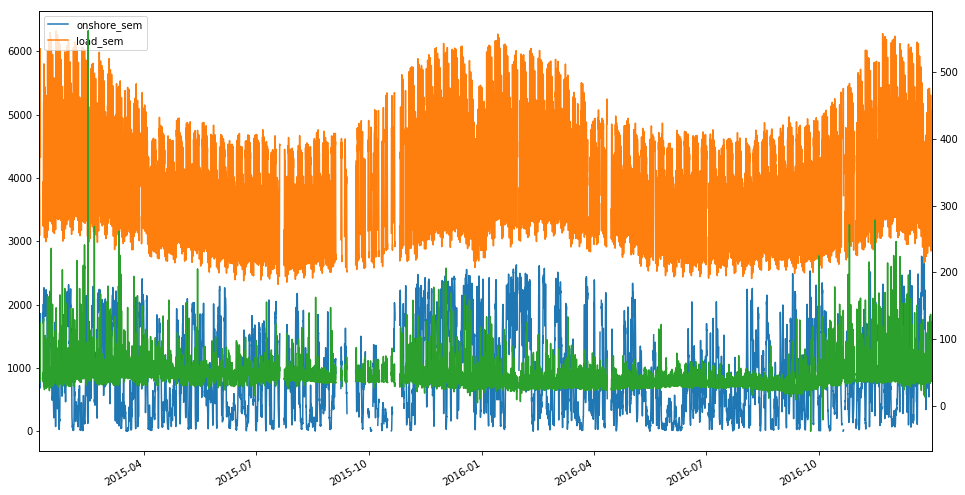

In [47]:
result[['onshore_sem', 'load_sem']].plot(figsize=(16,9))
result['price_da_sem'].plot(figsize=(16,9), secondary_y=True)